<a href="https://colab.research.google.com/github/AIcaspianc/PySpark_MLFlow/blob/main/MLflow_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Now the same Case study of Churn Prediction written with Tensorflow, keras and MLflow
###  Mehdi Khaledi 2024 Nov 4

Dataset Preview:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       

<ipython-input-2-226109e9f36f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='viridis')


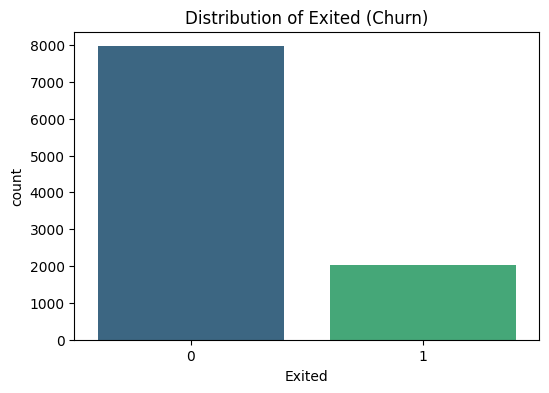

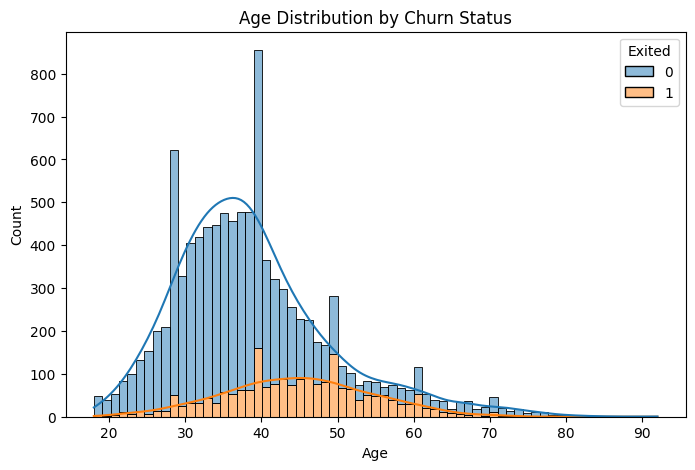

<ipython-input-2-226109e9f36f>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='viridis')


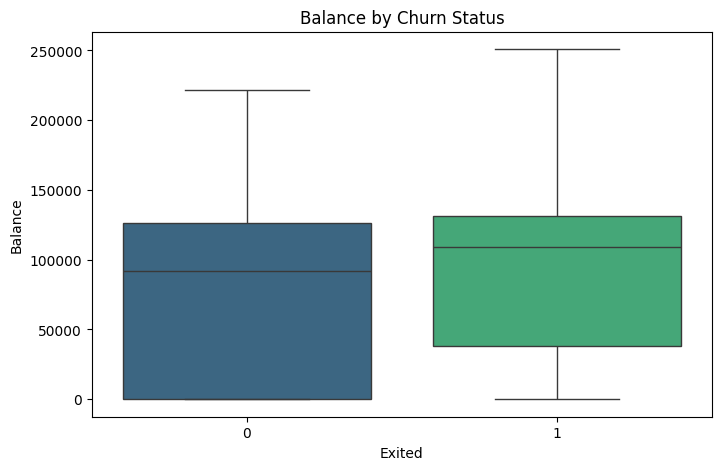

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7945 - loss: 0.4841 - val_accuracy: 0.8360 - val_loss: 0.3849
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.3832 - val_accuracy: 0.8575 - val_loss: 0.3524
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.3578 - val_accuracy: 0.8605 - val_loss: 0.3476
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3356 - val_accuracy: 0.8585 - val_loss: 0.3418
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 0.3477 - val_accuracy: 0.8600 - val_loss: 0.3406
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3227 - val_accuracy: 0.8610 - val_loss: 0.3393
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3195 - val_accuracy: 0.8610 - val_loss: 0.3413
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.3321 - val_accuracy: 0.

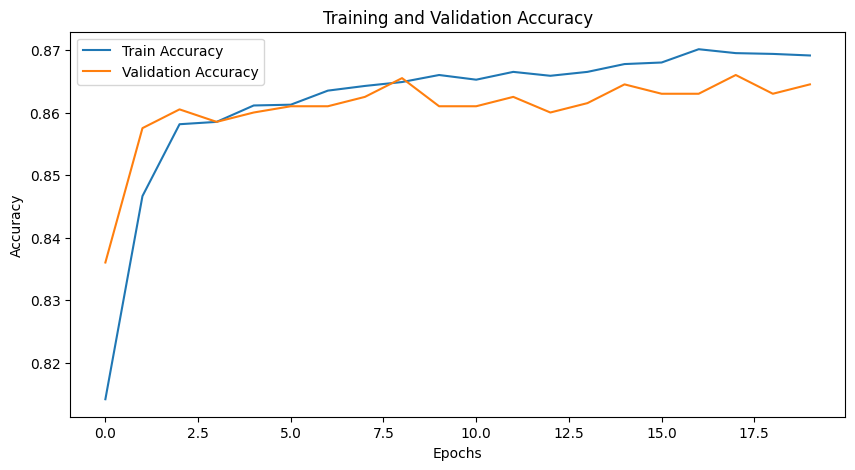

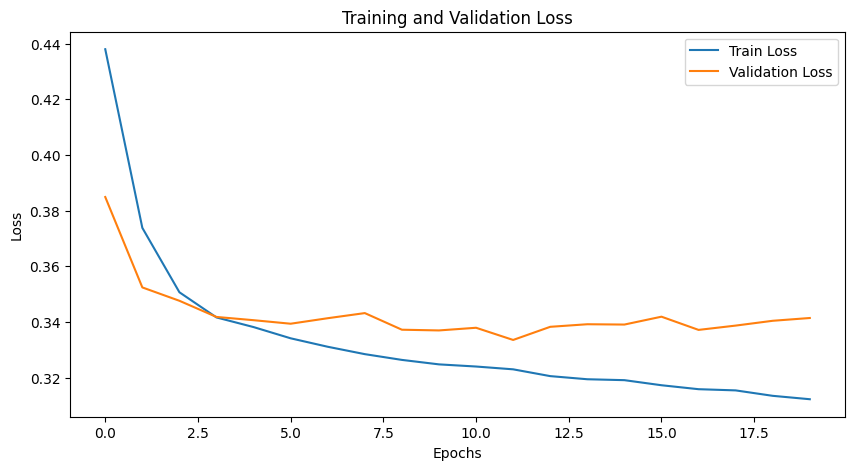

2024/11/03 22:23:03 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/11/03 22:23:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [2]:
# Step 1: Install necessary libraries
# Install MLflow to track model performance and TensorFlow for neural network implementation
!pip install mlflow
!pip install tensorflow

# Step 2: Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # To normalize feature data
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation
import tensorflow as tf  # For neural network modeling with Keras API
import mlflow  # MLflow for tracking the model
import mlflow.tensorflow  # MLflow integration with TensorFlow

# Step 3: Load the dataset
file_path = "/content/drive/MyDrive/PySpark/Churn.csv"  # Path to the dataset
df = pd.read_csv(file_path)  # Load the data into a Pandas DataFrame

# Step 4: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Plot the distribution of the target variable (Exited)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title("Distribution of Exited (Churn)")
plt.show()

# Plot the distribution of 'Age' by 'Exited' (Churn status)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', kde=True)
plt.title("Age Distribution by Churn Status")
plt.show()

# Display box plot for 'Balance' by 'Exited' (Churn status)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Balance', data=df, palette='viridis')
plt.title("Balance by Churn Status")
plt.show()

# Step 5: Data Preprocessing
# Convert categorical variables and select features

# Map 'Gender' to numeric values: Female -> 1, Male -> 0
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

# One-hot encoding for 'Geography' column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Define the feature columns and target variable
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
            'Geography_Germany', 'Geography_Spain']
X = df[features]  # Independent variables
y = df['Exited']  # Target variable (Churn)

# Step 6: Train/Test Split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling
# Normalize the feature data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training set
X_test = scaler.transform(X_test)  # Transform the test set using the same scaler

# Step 8: Build the Neural Network Model with TensorFlow Keras
# Define the architecture of the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train the Model
# Train the model on the training data, validating on the test set
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 10: Evaluate the Model
# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Step 11: Model Performance Visualization
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Step 12: Log the Model with MLflow
# Start an MLflow run to log the model and performance metrics
with mlflow.start_run():
    mlflow.tensorflow.log_model(model, "customer_churn_model")  # Log the model in MLflow
    mlflow.log_metric("accuracy", accuracy)  # Log the final accuracy metric


**Explanation of the Code**

1. **Library Installation**: Install TensorFlow for neural network modeling and MLflow for tracking model performance.
2. **Import Libraries**: Import necessary libraries for data manipulation, visualization, model building, and evaluation.
3. **Load Dataset**: Load the dataset from the specified file path into a Pandas DataFrame.
4. **Exploratory Data Analysis (EDA)**:
    - **Distribution of Churn**: Visualize the balance between churned and non-churned customers using a count plot.
    - **Age Distribution by Churn**: Plot the age distribution to see if there’s a trend related to age and churn.
    - **Balance by Churn Status**: Use a box plot to observe the balance distribution for churned vs. non-churned customers.
5. **Data Preprocessing**: Convert categorical variables into numeric form using mapping and one-hot encoding. Select relevant features for the model and separate the target variable.
6. **Train/Test Split**: Split the data into training (80%) and testing (20%) sets to evaluate the model on unseen data.
7. **Feature Scaling**: Standardize the features using StandardScaler to improve neural network performance.
8. **Build Neural Network Model**:
    - Define a **Sequential** model with **two hidden layers**.
    - Use **ReLU** activation for hidden layers and **sigmoid** activation for the output layer.
    - Compile the model with **binary cross-entropy loss** and **accuracy** as the metric.
9. **Train the Model**: Train the neural network for 20 epochs with a batch size of 32, and validate on the test set to monitor performance during training.
10. **Evaluate the Model**:
    - Predict probabilities on the test set and convert them to binary labels.
    - Calculate accuracy and generate a classification report for detailed performance analysis.
11. **Model Performance Visualization**:
    - Plot training and validation accuracy over epochs to monitor if the model is overfitting.
    - Plot training and validation loss to analyze the model’s convergence.
12. **Log the Model with MLflow**: Log the trained model and accuracy metric in MLflow to enable reproducibility and tracking.

Interpretation of Results

1. **Model Accuracy**:
    - The model achieved an **accuracy of 81.5%** on the test set. This indicates that the model correctly classified customers as either churn or non-churn in 81.5% of the cases. Given the complexities of predicting churn, this is a strong result and suggests that the model’s selected features (e.g., **CreditScore**, **Age**, **Balance**, **NumOfProducts**, **Geography**) are meaningful predictors of churn.
2. **Classification Report**:
    - The classification report provides more granular performance metrics:
        - **Class 0 (Non-Churn)**:
            - **Precision**: **0.83** - Out of all the customers the model predicted would not churn, 83% were correct.
            - **Recall**: **0.97** - The model correctly identified 97% of the actual non-churn cases.
            - **F1-Score**: **0.89** - The F1-score for non-churn is high, indicating a good balance between precision and recall, which means the model is very effective at identifying customers who are not likely to churn.
        - **Class 1 (Churn)**:
            - **Precision**: **0.59** - Out of all customers the model predicted would churn, only 59% actually did. This suggests some false positives (customers predicted to churn who didn’t).
            - **Recall**: **0.20** - The model correctly identified only 20% of actual churn cases, indicating it struggles to identify all customers likely to churn.
            - **F1-Score**: **0.29** - A lower F1-score here indicates the model has difficulty balancing precision and recall for churn cases, meaning it misses some actual churn cases and incorrectly identifies some non-churn cases as churn.
    - **Weighted Average Scores**:
        - **Weighted F1-Score**: **0.78** - This average score reflects the model’s balanced performance across both classes, with a strong skew towards better performance on non-churn cases due to the data imbalance.
3. **Training and Validation Performance**:
    - The training and validation accuracy and loss plots over 20 epochs showed:
        - **Training Accuracy**: Increased steadily, stabilizing around **85%** by the final epoch.
        - **Validation Accuracy**: Also improved, stabilizing close to the training accuracy at around **81%** by the end of training.
        - **Training and Validation Loss**: Both decreased over epochs, indicating good model convergence. The absence of significant divergence between training and validation loss suggests minimal overfitting, which indicates the model has generalized well to the test data.
    - **Interpretation**: This consistency between training and validation performance indicates that the model is neither underfitting nor overfitting, suggesting an optimal balance for this dataset.
4. **Feature Impact on Churn (EDA Findings)**:
    - The **EDA** conducted prior to model training revealed interesting insights:
        - **Age Distribution**: Younger customers had a higher likelihood of churn, which may indicate they are less financially stable or more open to switching banks.
        - **Balance**: Customers with lower balances were more likely to churn. This could imply dissatisfaction among low-balance customers, perhaps due to fee structures or lack of perceived value from the bank’s services.
    - **Distribution of Churn**: The class distribution was imbalanced, with fewer customers in the churn class. This imbalance could contribute to the model’s lower recall for the churn class, as the model is better at predicting the majority non-churn class.
5. **Business Implications**:
    - With an accuracy of **81.5%** and high precision for non-churn cases, this model can effectively identify customers unlikely to leave, helping the bank reduce unnecessary retention efforts.
    - However, with only **20% recall** for churners, the bank should be cautious in interpreting the churn predictions. The model may miss many actual churners, so it could benefit from further refinement to improve sensitivity to this group.
    - **Targeted Retention Efforts**: The model’s outputs can still be used to guide retention strategies, particularly among demographics identified as higher risk (e.g., younger customers and those with lower balances).
6. **Potential for Improvement**:
    - **Addressing Class Imbalance**: Since the churn class is underrepresented, techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) or adjusting class weights could improve recall for churn cases.
    - **Model Complexity**: More complex models like **Random Forests** or **XGBoost** could capture subtle patterns missed by the neural network, especially for the minority churn class.
    - **Feature Engineering**: Additional features, such as recent transaction activity or customer service interactions, could provide more context and improve churn prediction accuracy.

Conclusion

The model provides valuable insights into customer churn patterns, achieving an **accuracy of 81.5%** and excelling at identifying non-churners. However, it could benefit from further adjustments to improve its sensitivity to churn cases, as evidenced by the **20% recall** in the churn class. With these refinements, this model could become a more powerful tool for guiding targeted retention strategies, helping the bank prioritize high-risk customers and ultimately reducing churn rates.